In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('acetic acid import data_csv.csv')

In [3]:
data.head()

,Year,Parameter,Value
0,2002-03,QTY,43203
1,NaN,VAL,7909
2,2003-04,QTY,27030
3,NaN,VAL,5300
4,2004-05,QTY,70396


In [4]:
data.head(10)

,Year,Parameter,Value
0,2002-03,QTY,43203
1,NaN,VAL,7909
2,2003-04,QTY,27030
3,NaN,VAL,5300
4,2004-05,QTY,70396
5,NaN,VAL,17397
6,2005-06,QTY,43119
7,NaN,VAL,12379
8,2006-07,QTY,124464
9,NaN,VAL,32678


In [5]:
data.shape[0]

34

In [6]:
qty = []
val = []
year = []
for i in range (0,data.shape[0]):
    if(i%2 == 0):
        qty.append(data['Value'][i])
        year.append(data['Year'][i])
    else:
        val.append(data['Value'][i])

In [7]:
import_data = pd.DataFrame(year, columns = ['Year'])
import_data['Quantity(in MT)'] = qty
import_data['Value(in Lakhs)'] = val

In [8]:
import_data.head(import_data.shape[0]-1)

,Year,Quantity(in MT),Value(in Lakhs)
0,2002-03,43203,7909
1,2003-04,27030,5300
2,2004-05,70396,17397
3,2005-06,43119,12379
4,2006-07,124464,32678
5,2007-08,136422,36149
6,2008-09,285037,69914
7,2009-10,389650,82134
8,2010-11,466097,96233
9,2011-12,570040,152012


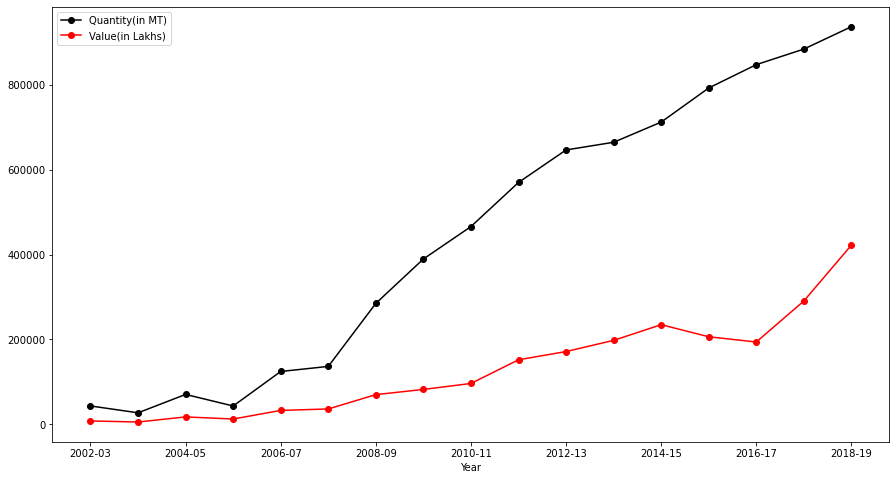

In [9]:
ax = import_data.plot(x ='Year', y = 'Quantity(in MT)', figsize=(15,8), marker = 'o', color = 'black')
import_data.plot(x ='Year', y = 'Value(in Lakhs)', figsize=(15,8), marker = 'o', color = 'red', ax= ax)

In [10]:
year_arr = []
for x in import_data['Year']:
    year_arr.append(x[0:4])
import_data['Year(numerical)'] = year_arr
import_data['Year(numerical)'] = pd.to_datetime(import_data['Year(numerical)'])
import_data.drop(['Quantity(in MT)', 'Value(in Lakhs)'],axis = 1, inplace = True)
import_data['Quantity(in MT)'] = qty
import_data['Value(in Lakhs)'] = val
import_data.set_index('Year(numerical)', inplace = True)
import_data.head()

,Year,Quantity(in MT),Value(in Lakhs)
Year(numerical),,,
2002-01-01,2002-03,43203,7909
2003-01-01,2003-04,27030,5300
2004-01-01,2004-05,70396,17397
2005-01-01,2005-06,43119,12379
2006-01-01,2006-07,124464,32678


In [11]:
data_to_fit = import_data.drop(['Year','Value(in Lakhs)'], axis = 1)
data_to_fit.head()

,Quantity(in MT)
Year(numerical),
2002-01-01,43203
2003-01-01,27030
2004-01-01,70396
2005-01-01,43119
2006-01-01,124464


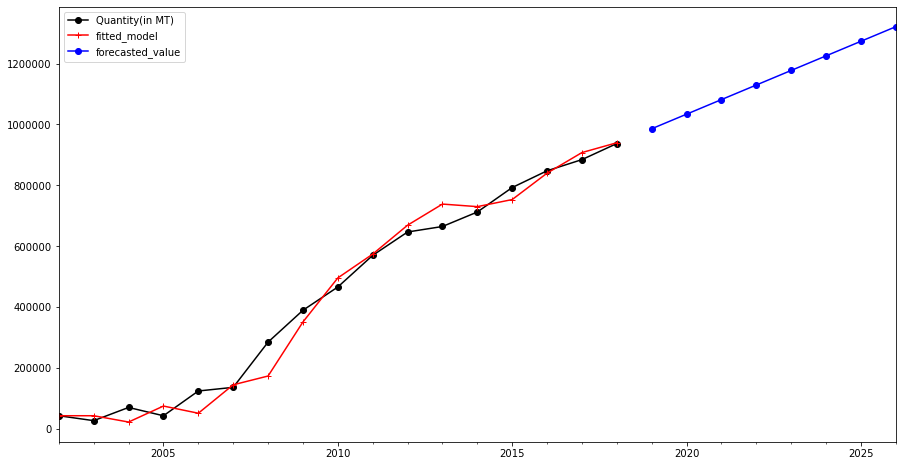

In [12]:
data_to_fit.index = pd.DatetimeIndex(data_to_fit.index.values,freq=data_to_fit.index.inferred_freq)
#Using Holt's Winter model for forecasting future expected import quantities
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data_to_fit, trend = 'add', damped = False)
np.warnings.filterwarnings('ignore')
model_fit = model.fit(optimized = True)
fcast = model_fit.forecast(8)
ax = data_to_fit.plot(marker='o', color='black', figsize=(15,8), legend=True)
ax.ticklabel_format(style='plain', axis = 'y')
model_fit.fittedvalues.plot(marker='+', ax=ax, color='red', legend=True, label = 'fitted_model')
fcast.plot(marker = 'o', ax=ax, color = 'blue', legend = True, label = 'forecasted_value')

In [13]:
i = 0
print('The import Quantities of 16 years')
for x in import_data['Quantity(in MT)']:
    print(import_data['Year'][i], ':', int(x), 'MT')
    i+=1;

The import Quantities of 16 years
2002-03 : 43203 MT
2003-04 : 27030 MT
2004-05 : 70396 MT
2005-06 : 43119 MT
2006-07 : 124464 MT
2007-08 : 136422 MT
2008-09 : 285037 MT
2009-10 : 389650 MT
2010-11 : 466097 MT
2011-12 : 570040 MT
2012-13 : 646738 MT
2013-14 : 664797 MT
2014-15 : 712384 MT
2015-16 : 792775 MT
2016-17 : 847808 MT
2017-18 : 884515 MT
2018-19 : 937298 MT


In [14]:
i = 1
print('Expected import Quantities')
for x in fcast:
    print(2018+i,'-',19+i,':', int(x), 'MT')
    i+=1;

Expected import Quantities
2019 - 20 : 985883 MT
2020 - 21 : 1033776 MT
2021 - 22 : 1081669 MT
2022 - 23 : 1129561 MT
2023 - 24 : 1177454 MT
2024 - 25 : 1225347 MT
2025 - 26 : 1273240 MT
2026 - 27 : 1321132 MT


In [15]:
#forecasting using Holt's method for value
data_to_fit2 = import_data.drop(['Year','Quantity(in MT)'], axis = 1)
data_to_fit2.head()

,Value(in Lakhs)
Year(numerical),
2002-01-01,7909
2003-01-01,5300
2004-01-01,17397
2005-01-01,12379
2006-01-01,32678


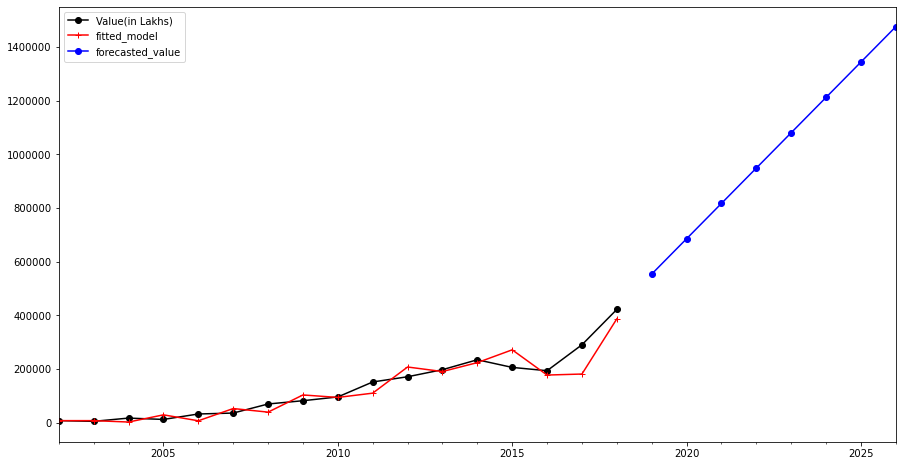

In [16]:
data_to_fit2.index = pd.DatetimeIndex(data_to_fit2.index.values,freq=data_to_fit2.index.inferred_freq)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model2 = ExponentialSmoothing(data_to_fit2, trend = 'add', damped = False)
np.warnings.filterwarnings('ignore')
model_fit2 = model2.fit(optimized = True)
fcast2 = model_fit2.forecast(8)
ax2 = data_to_fit2.plot(marker='o', color='black', figsize=(15,8), legend=True)
ax2.ticklabel_format(style='plain', axis = 'y')
model_fit2.fittedvalues.plot(marker='+', ax=ax2, color='red', legend=True, label = 'fitted_model')
fcast2.plot(marker = 'o', ax=ax2, color = 'blue', legend = True, label = 'forecasted_value')

In [17]:
i = 0
print('The import value of 16 years')
for x in import_data['Value(in Lakhs)']:
    print(import_data['Year'][i], ':', int(x), 'Lakhs')
    i+=1;

The import value of 16 years
2002-03 : 7909 Lakhs
2003-04 : 5300 Lakhs
2004-05 : 17397 Lakhs
2005-06 : 12379 Lakhs
2006-07 : 32678 Lakhs
2007-08 : 36149 Lakhs
2008-09 : 69914 Lakhs
2009-10 : 82134 Lakhs
2010-11 : 96233 Lakhs
2011-12 : 152012 Lakhs
2012-13 : 171462 Lakhs
2013-14 : 197806 Lakhs
2014-15 : 234821 Lakhs
2015-16 : 206305 Lakhs
2016-17 : 193958 Lakhs
2017-18 : 290624 Lakhs
2018-19 : 422360 Lakhs


In [18]:
i = 1
print('Expected import Quantities')
for x in fcast2:
    print(2018+i,'-',19+i,':', int(x), 'Lakhs')
    i+=1;

Expected import Quantities
2019 - 20 : 554096 Lakhs
2020 - 21 : 685836 Lakhs
2021 - 22 : 817576 Lakhs
2022 - 23 : 949316 Lakhs
2023 - 24 : 1081055 Lakhs
2024 - 25 : 1212795 Lakhs
2025 - 26 : 1344535 Lakhs
2026 - 27 : 1476275 Lakhs


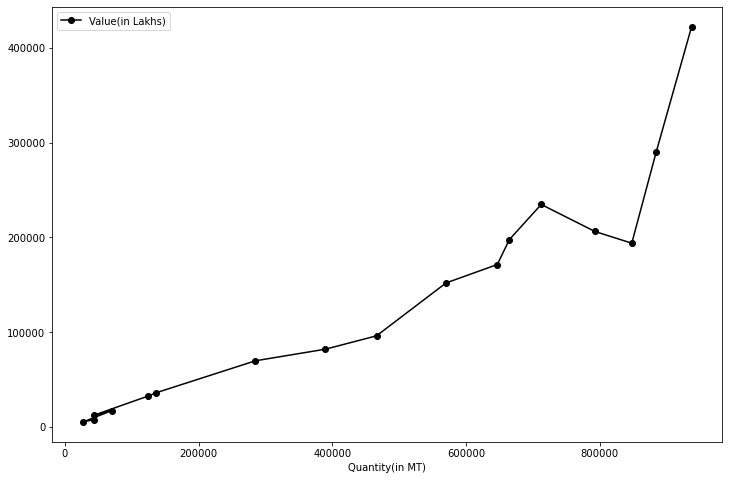

In [19]:
#forecasting value based on the value of quantity of past imports
import_data.plot(x='Quantity(in MT)', y = 'Value(in Lakhs)', marker = 'o', color = 'Black', figsize=(12,8))

In [20]:
#using Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = np.array(import_data['Quantity(in MT)']).reshape(-1,1)
y = np.array(import_data['Value(in Lakhs)']).reshape(-1,1)

In [21]:
X_temp = np.multiply(X,X)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size = 0.25)
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9013342925377468


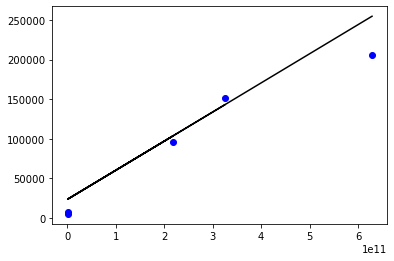

In [22]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [23]:
print(regr.coef_, regr.intercept_)

[[3.67644856e-07]] [23603.55531265]


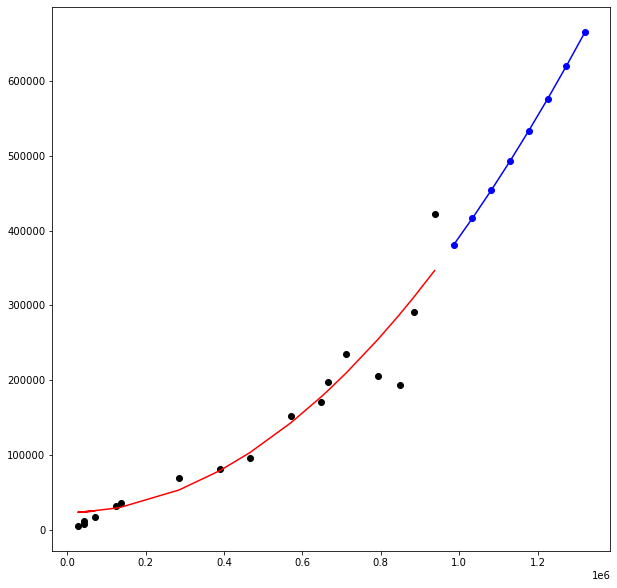

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(x = import_data['Quantity(in MT)'], y = import_data['Value(in Lakhs)'], color = 'black', marker = 'o')
y_fitted = np.add(np.multiply(X_temp,regr.coef_),regr.intercept_)
plt.plot(X, y_fitted, color = 'red')
#for forecasted values of quantity the expected Value can now be given
val_predicted =[]
qty_predicted =[]
for x in fcast:
    val = ((x*x)*regr.coef_[0][0])+regr.intercept_[0]
    val_predicted.append(val)
    qty_predicted.append(int(x))
plt.plot(qty_predicted, val_predicted, color='blue', marker = 'o')

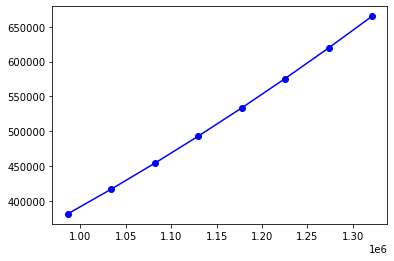

In [25]:
#for forecasted values of quantity the expected Value can now be given
val_predicted =[]
qty_predicted =[]
for x in fcast:
    val = ((x*x)*regr.coef_[0][0])+regr.intercept_[0]
    val_predicted.append(int(val))
    qty_predicted.append(int(x))
plt.plot(qty_predicted, val_predicted, color='blue', marker = 'o')

In [26]:
val_forecast = pd.DataFrame(val_predicted, columns = ['Forecasted Values of Import'])
val_forecast.set_index(fcast.index, inplace = True)
val_forecast

,Forecasted Values of Import
2019-01-01,380942
2020-01-01,416503
2021-01-01,453751
2022-01-01,492685
2023-01-01,533306
2024-01-01,575613
2025-01-01,619607
2026-01-01,665288


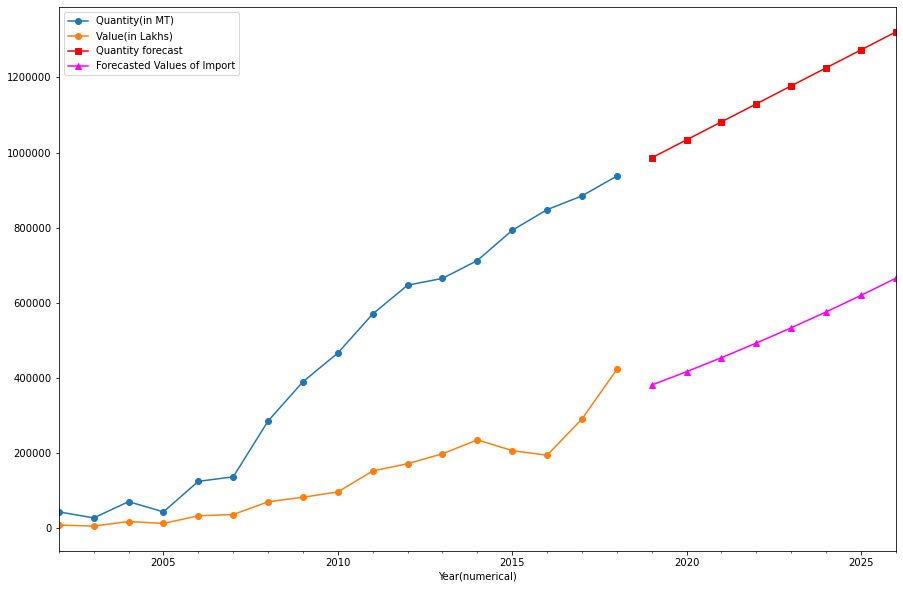

In [27]:
ax3 = import_data.plot(figsize=(15,10), marker = 'o')
ax3.ticklabel_format(style = 'plain', axis = 'y')
fcast.plot(ax = ax3, marker = 's', color = 'red', legend = True, label = 'Quantity forecast')
val_forecast.plot(ax=ax3, marker = '^', color = 'magenta', legend = True)
#storing data
forecasted_data = pd.DataFrame()
forecasted_data['Quantity(in MT)'] = fcast
forecasted_data['Value(in Lakhs)'] = val_predicted
forecasted_data.set_index(fcast.index, inplace = True)
forecasted_data.index.name = 'Year(numerical)'
forecasted_data = forecasted_data.astype(int)

In [28]:
a = "IMPORT DATA"
print("\033[1m",a.center(40), "\033[0m")
import_data.drop('Year', axis = 1).head(17)

               IMPORT DATA                


,Quantity(in MT),Value(in Lakhs)
Year(numerical),,
2002-01-01,43203,7909
2003-01-01,27030,5300
2004-01-01,70396,17397
2005-01-01,43119,12379
2006-01-01,124464,32678
2007-01-01,136422,36149
2008-01-01,285037,69914
2009-01-01,389650,82134
2010-01-01,466097,96233


In [29]:
a = "FORECASTED IMPORT DATA"
print("\033[1m",a.center(40), "\033[0m")
forecasted_data.head(8)

          FORECASTED IMPORT DATA          


,Quantity(in MT),Value(in Lakhs)
Year(numerical),,
2019-01-01,985883,380942
2020-01-01,1033776,416503
2021-01-01,1081669,453751
2022-01-01,1129561,492685
2023-01-01,1177454,533306
2024-01-01,1225347,575613
2025-01-01,1273240,619607
2026-01-01,1321132,665288
